In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [10]:
class Lagrange:
    ''' A class for building quadratic Lagrange polynomials.
    
    Inputs
    ------
    x: array-like
    y: array-like

    Returns
    -------
    u: The Polynomial interpolation over the range covered
    by x and y
    '''
    def __init__(self):
        pass

    def _build_basis(self,x,idx):
        xarr = np.linspace(x[0],x[-1])
        temp = np.ones_like(xarr)
        for i in range(len(x)):
            if i != idx:
                basis = (xarr-x[i])/(x[idx]-x[i])
                temp *= basis
        return temp, xarr

    def __call__(self,x,y,return_x=False):
        self.Narr = []
        for i in range(len(x)):
            N, xarr = self._build_basis(x,i)
            self.Narr.append(N)
        u = np.zeros_like(xarr)
        for i, N in enumerate(self.Narr):
            u += N*y[i]
        if return_x:
            return u, xarr
        else:
            return u


In [11]:
li = Lagrange()
x = [0.5,2.0,4.0]
y = [2.0,1.0,4.0]
u, xi = li(x,y,True)

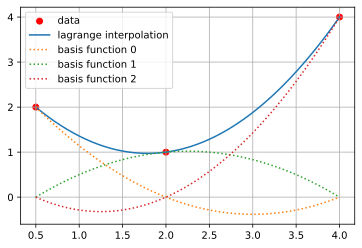

In [20]:
plt.scatter(x,y,c='r',label='data')
plt.plot(xi,u,label='lagrange interpolation')
for i,N in enumerate(li.Narr):
    plt.plot(xi,N*y[i],ls=':',label=f'basis function {i}')
plt.grid()
plt.legend()
plt.show()